<a href="https://colab.research.google.com/github/kabirchhabra/Skillslash/blob/main/Deep_Learning/6_CNN_CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model
sns.set_style('darkgrid')

In [7]:
#Loading the data
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
print("y_train.shape", y_train.shape)

y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("y_train.shape", y_train.shape)

y_train.shape (50000, 1)
x_train.shape: (50000, 32, 32, 3)
y_train.shape (50000,)


In [8]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [9]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [10]:
# Compile and fit
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 20s 5ms/step - loss: 1.5717 - accuracy: 0.4259 - val_loss: 1.2764 - val_accuracy: 0.5360
Epoch 2/15
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2759 - accuracy: 0.5390 - val_loss: 1.1326 - val_accuracy: 0.5924
Epoch 3/15
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1472 - accuracy: 0.5883 - val_loss: 1.0249 - val_accuracy: 0.6397
Epoch 4/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0537 - accuracy: 0.6241 - val_loss: 1.0103 - val_accuracy: 0.6452
Epoch 5/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9788 - accuracy: 0.6518 - val_loss: 0.9550 - val_accuracy: 0.6669
Epoch 6/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9212 - accuracy: 0.6744 - val_loss: 0.9213 - val_accuracy: 0.6719
Epoch 7/15
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8748 - accuracy: 0.6918 - val_loss: 0.8712 - val_accuracy

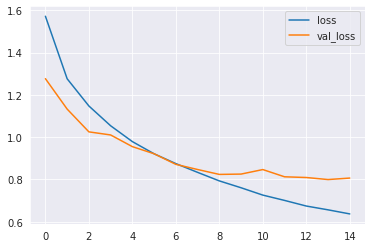

In [11]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

**Observation:** We get an accuracy of 71%, so its clear now that CIFAR 10 is even more difficult dataset than MNIST and Fashion MNIST. And also we can see that there is a chance of overfitting.

In [11]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

**Observation:**

We see that the training accuracy has not yet converged while the Validation accuracy is still steady. This is another sign that we could be Overfitting. 

If the training accuracy is getting higher without any improvement in the Validation accuracy, then the model is only learning to match the noise in the training set.

Confusion matrix, without normalization
[[756  19  57  14  30   5  12   4  68  35]
 [ 17 844   2   4   4   4  20   2  18  85]
 [ 54   4 588  22 121  60 101  29  14   7]
 [ 24   5  67 326  99 254 169  34   8  14]
 [ 23   2  57  26 723  29  73  54   9   4]
 [ 15   2  51  81  69 653  71  47   6   5]
 [  3   3  20  10  43  27 877   2   9   6]
 [ 20   3  32  22  69  49  24 771   1   9]
 [ 60  35  15  13   8   6  11   5 820  27]
 [ 38  71   8   6   9   5  12  13  17 821]]


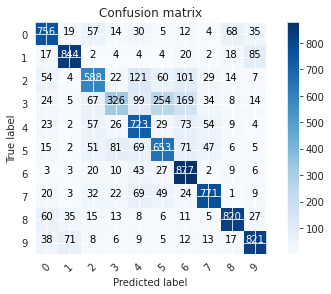

In [12]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



In [13]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

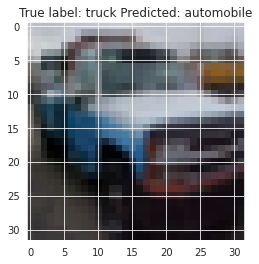

In [16]:
# Show some misclassified examples
# TODO: add label names
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

Did you observe almost all of the images appear nothing at all. They seem to be quite blur barely helping us in identifying anything.

Therefore identifying classes of such images is also a challenge in Deep Learning. And hence there are a lot of misclassifications in the above Confusion Matrix.

*However, later on we will be improving these results. Lets skip the Confusion Matrix for now.*

**END**